# First Name: Caleb
# Last Name: Webster

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
# Read dataset.
bottle = pd.read_csv("bottle.csv", low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)
len(bottle)

864863

# Data management 

In [3]:
# Convert variables to numeric.
bottle["Depthm"] = pd.to_numeric(bottle["Depthm"], errors="coerce")
bottle["PO4uM"] = pd.to_numeric(bottle["PO4uM"], errors="coerce")
bottle["SiO3uM"] = pd.to_numeric(bottle["SiO3uM"], errors="coerce")
bottle["T_degC"] = pd.to_numeric(bottle["T_degC"], errors="coerce")
bottle["NO2uM"] = pd.to_numeric(bottle["NO2uM"], errors="coerce")
bottle["NO3uM"] = pd.to_numeric(bottle["NO3uM"], errors="coerce")
bottle["NH3uM"] = pd.to_numeric(bottle["NH3uM"], errors="coerce")
bottle["STheta"] = pd.to_numeric(bottle["STheta"], errors="coerce")
bottle["PO4uM"].describe()

count   413317.000000
mean         1.564747
std          1.035966
min          0.000000
25%          0.470000
50%          1.570000
75%          2.480000
max          5.210000
Name: PO4uM, dtype: float64

In [4]:
# Replace nan values with 0.
bottle["SiO3uM"] = bottle["SiO3uM"].fillna(0)
bottle["Oxy_µmol/Kg"] = bottle["Oxy_µmol/Kg"].fillna(0)
bottle["NO2uM"] = bottle["NO2uM"].fillna(0)
bottle["NO3uM"] = bottle["NO3uM"].fillna(0)
bottle['NH3uM'] = bottle['NH3uM'].fillna(0)
bottle["STheta"] = bottle["STheta"].fillna(0)

# Box Plot of DEPTHCATEGORY (Categorical) vs Si03uM (Quantitative)

In [5]:
# Obtain a subset of the data such that Si03uM is recorded and Depthm <= 1000 (no recordings for Si03uM past this depth).
sub1 = bottle[(bottle['SiO3uM'] != 0) & (bottle["Depthm"] <= 1000)].copy()

In [59]:
# Create a new variable, DEPTHCATEGORY, by cutting Depthm into 5 categories.
sub1["DEPTHCATEGORY"] = pd.cut(sub1["Depthm"], [0, 200, 400, 600, 800, 1000])
sub1["DEPTHCATEGORY"] = sub1["DEPTHCATEGORY"].astype("category")
sub1["DEPTHCATEGORY"].value_counts()

(0, 200]       233634
(200, 400]      68788
(400, 600]      30587
(600, 800]       2278
(800, 1000]      1378
Name: DEPTHCATEGORY, dtype: int64

Text(0.5, 1.0, 'Silicate Concentration of Water at Different Depths')

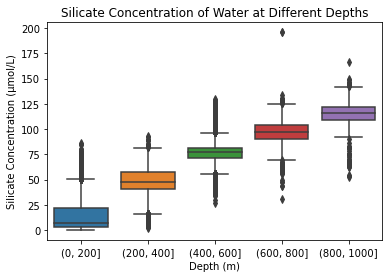

In [60]:
%matplotlib inline
# Box Plot.
sns.boxplot(x='DEPTHCATEGORY', y='SiO3uM', data=sub1)
plt.xlabel("Depth (m)")
plt.ylabel("Silicate Concentration (µmol/L)")
plt.title("Silicate Concentration of Water at Different Depths")

# Histogram of T_degC (Quantitative)

In [41]:
# Obtain a subset of the data such that depth <= 50m
sub6 = bottle[(bottle["Depthm"] <= 50)].copy()

In [42]:
# Describe variable T_degC.
bottle["T_degC"].describe()

count   853900.000000
mean        10.799677
std          4.243825
min          1.440000
25%          7.680000
50%         10.060000
75%         13.880000
max         31.140000
Name: T_degC, dtype: float64

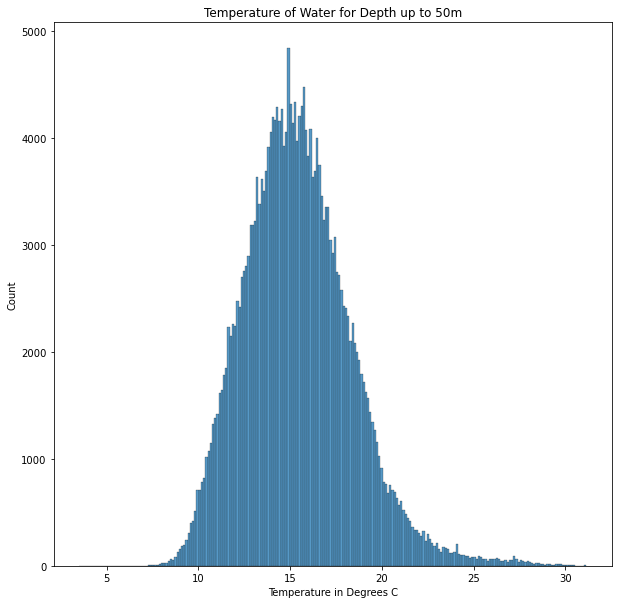

In [43]:
%matplotlib inline
# Histogram.
plt.figure(figsize=(10, 10))
sns.histplot(sub6["T_degC"].dropna(), kde=False)
plt.xlabel("Temperature in Degrees C")
plt.title("Temperature of Water for Depth up to 50m");

# Line chart of Oxy_µmol/Kg (Quantitative)

In [44]:
# Obtain a subset of the data such that Oxy_µmol/Kg is recorded.
sub2 = bottle[(bottle["Oxy_µmol/Kg"] != 0) & (bottle["Depthm"] <= 500)].copy()
sub2["Oxy_µmol/Kg"].value_counts(sort=False, dropna=False)

101.377100    2
268.539300    1
182.444200    1
110.530200    1
140.175800    1
             ..
57.439620     1
166.706600    1
89.645680     1
268.814900    1
174.993000    1
Name: Oxy_µmol/Kg, Length: 365579, dtype: int64

In [45]:
# Group Oxy_µmol/Kg by water depth.
var1 = sub2.groupby(["Depthm"])["Oxy_µmol/Kg"].mean()
var1

Depthm
0     248.799488
1     251.001795
2     253.196869
3     252.297066
4     255.277204
         ...    
496    21.547540
497    21.338982
498    22.557824
499    21.136669
500    22.051483
Name: Oxy_µmol/Kg, Length: 501, dtype: float64

Text(0.5, 1.0, 'Oxygen Concentration Recorded at Different Depths of Water')

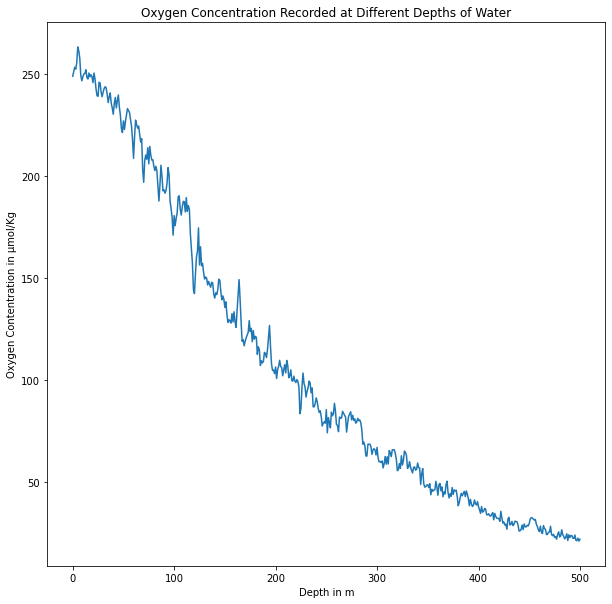

In [46]:
%matplotlib inline
# Line Chart.
plt.figure(figsize=(10, 10))
var1.plot(kind="line");
plt.xlabel("Depth in m")
plt.ylabel("Oxygen Contentration in µmol/Kg")
plt.title("Oxygen Concentration Recorded at Different Depths of Water")

# Bubble Chart of NO2uM, NO3uM, and NH3uM (Quantitative)

In [32]:
# Obtain a subset of the data such that NO2uM, NO3uM, and NH3uM are recorded.
# Outliers are removed by capping NO2uM at 1.5.
sub3 = bottle[(bottle["NO2uM"] < 1.5) & (bottle["NO3uM"] != 0) & (bottle["NH3uM"] != 0) & (bottle["Depthm"] <= 50)]

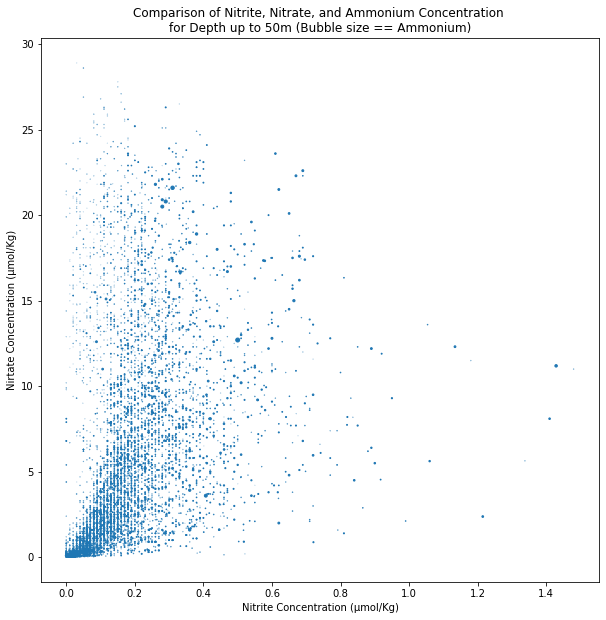

In [48]:
%matplotlib inline
# Bubble Chart.
plt.figure(figsize=(10, 10))
plt.scatter(sub3["NO2uM"], sub3["NO3uM"], s=sub3["NH3uM"])
plt.xlabel("Nitrite Concentration (µmol/Kg)")
plt.ylabel("Nirtate Concentration (µmol/Kg)")
plt.title("Comparison of Nitrite, Nitrate, and Ammonium Concentration \nfor Depth up to 50m (Bubble size == Ammonium)");

# Select Plot - HeatMap of 

In [49]:
# Obtain a subset of the data such that Po4uM is recorded.
sub4 = bottle[(bottle["PO4uM"] != 0) & (bottle["Depthm"] <= 250)].copy()

In [50]:
# Create a new variable, DEPTHCATEGORY, by cutting Depthm into 5 categories.
sub4["DEPTHCATEGORY"] = pd.cut(sub4["Depthm"], [0, 50, 100, 150, 200, 250])
sub4["DEPTHCATEGORY"] = sub4["DEPTHCATEGORY"].astype("category")
sub4["DEPTHCATEGORY"].value_counts()

(0, 50]       221208
(50, 100]     140124
(100, 150]    104647
(150, 200]     63425
(200, 250]     55178
Name: DEPTHCATEGORY, dtype: int64

In [51]:
# Split phosphate concentration readings into whether or not they were greater than mean value.
def greater_than_mean(mean, row):
    if row["PO4uM"] > mean:
        return 1
    else:
        return 0
phosphate_mean = sub4["PO4uM"].mean()
sub4["POSPHATEGREATERTHANMEAN"] = sub4.apply(lambda row: greater_than_mean(phosphate_mean, row), axis=1)
sub4["POSPHATEGREATERTHANMEAN"].value_counts()

0    482403
1    135580
Name: POSPHATEGREATERTHANMEAN, dtype: int64

In [52]:
# Create a new DataFrame containing only the required variables.
sub5 = sub4[["DEPTHCATEGORY", "POSPHATEGREATERTHANMEAN"]].copy()

In [53]:
# Create pivot table.
table = pd.pivot_table(sub5, index=["DEPTHCATEGORY"], columns=["POSPHATEGREATERTHANMEAN"], aggfunc=np.size)
print(table)

POSPHATEGREATERTHANMEAN       0      1
DEPTHCATEGORY                         
(0, 50]                  423580  18836
(50, 100]                217924  62324
(100, 150]               129088  80206
(150, 200]                69182  57668
(200, 250]                58756  51600


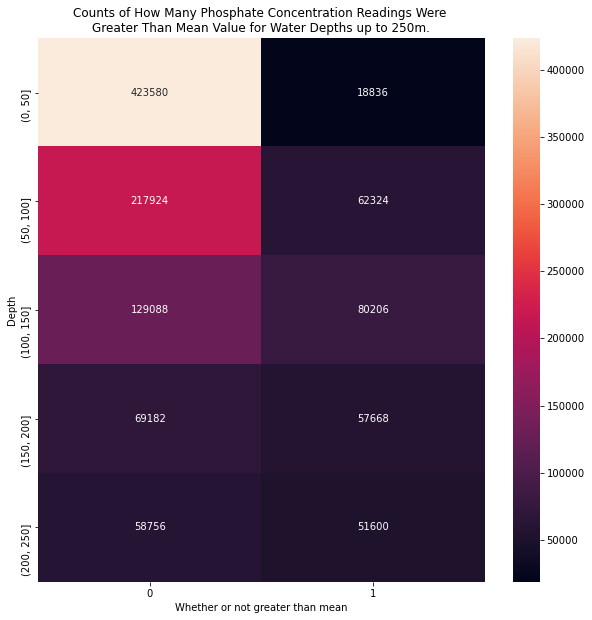

In [61]:
%matplotlib inline
# HeatMap.
fig = plt.figure(figsize=(10, 10))
sns.heatmap(table, annot=True, fmt="d")
plt.xlabel("Whether or not greater than mean")
plt.ylabel("Depth")
plt.title("Counts of How Many Phosphate Concentration Readings Were \nGreater Than Mean Value for Water Depths up to 250m.");